LINK FOR COLAB FILE - https://colab.research.google.com/drive/16GhKyUF2ySkXYwZ3FolH-hr9g4rNUhMR#scrollTo=nQ8nF2Lw1orC

INSTALLING, IMPORTING ALL NECESSARY LIBRARIES AND DATABASE

In [ ]:
!pip install db-sqlite3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# dropping table if exist in database
with sqlite3.connect('StockPerformanceAnalysis.db') as conn:
    cursor = conn.cursor()
    cursor.execute("DROP TABLE IF EXISTS StockPerformanceDetails")
    conn.commit()

In [ ]:
# create table in database
with sqlite3.connect('StockPerformanceAnalysis.db') as conn:
    cursor = conn.cursor()
    cursor.execute('CREATE TABLE StockPerformanceDetails (id INTEGER PRIMARY KEY, StockCode TEXT, OpeningAmount Numeric(10,2),ClosingAmount Numeric(10,2),HighAmount Numeric(10,2),LowAmount Numeric(10,2),TradingDate TEXT)')
    conn.commit()

In [ ]:
# list of all stocks will store in stockList
stockList=[]

In [ ]:
# sample stock code for testing AAPL
stockCode=input("please enter your stock code for analysis: ")
stockList.append(stockCode)
print("stock code you choosed for analysis: ",stockCode)

please enter your stock code for analysis: AAPL
stock code you choosed for analysis:  AAPL


In [ ]:
startDate=input("please enter start date (YYYY-MM-DD): ")
endDate=input("please enter end date (YYYY-MM-DD): ")
print("date range selected from %s to %s for %s"%(startDate,endDate,stockCode))

please enter start date (YYYY-MM-DD): 2023-01-01
please enter end date (YYYY-MM-DD): 2023-03-31
date range selected from 2023-01-01 to 2023-03-31 for AAPL


In [ ]:
# code is used for adding competitor stock code for fundamental and technical comparison analysis
# sample stock code for testing MSFT, AMZN
isContinue='y'
while isContinue=='y':
  competetorStockCode=input("please add competetor stock code: ")
  stockList.append(competetorStockCode)
  isContinue=input("do you want to add more competetor stock code (y or n): ")

please add competetor stock code: AMZN
do you want to add more competetor stock code (y or n): y
please add competetor stock code: MSFT
do you want to add more competetor stock code (y or n): n


In [ ]:
# display all stock code added by user
for i in range(len(stockList)):
  if i==0:
    print("your stock code: ",stockList[i])
  else:
    print("competetor stock code: ",stockList[i])

your stock code:  AAPL
competetor stock code:  AMZN
competetor stock code:  MSFT


In [ ]:
# code is used to preprocessed epoch data.
# convert epoch to yyyy-mm-dd format 
def convertEpochToDateTimestamp(epochTime):
  date = datetime.datetime.fromtimestamp(epochTime/1000).strftime('%Y-%m-%d')
  return date

In [ ]:
# code is used to fetch stock data from polygon.io api based on user stock input and date range selection
# Create an empty dataframe with columns
df = pd.DataFrame(columns=['stock-code', 'opening-amount', 'closing-amount', 'high-price','low-price','weighted-average-price','number-of-transaction','trading-date'])

for i in range(len(stockList)):
  apiURL='https://api.polygon.io/v2/aggs/ticker/'+stockList[i]+'/range/1/day/'+startDate+'/'+endDate+'?apiKey=3Vdhl0r03kVIHQWajFdZpyBkDV6jD1MK'

  # Make API request
  response = requests.get(apiURL)

  # Parse JSON response into dictionary
  data = response.json()

  # Loop through the JSON response and add each contact as a new row to the DataTable
  for resultData in data['results']:
      row = [stockList[i],resultData['o'], resultData['c'], resultData['h'], resultData['l'], resultData['vw'], resultData['n'], resultData['t']]
      df.loc[len(df)] = row  

# Display datatable
print(df)

    stock-code  opening-amount  closing-amount  high-price  low-price  \
0         AAPL         130.280          125.07    130.9000   124.1700   
1         AAPL         126.890          126.36    128.6557   125.0800   
2         AAPL         127.130          125.02    127.7700   124.7600   
3         AAPL         126.010          129.62    130.2900   124.8900   
4         AAPL         130.465          130.15    133.4100   129.8900   
..         ...             ...             ...         ...        ...   
181       MSFT         280.500          276.38    281.4589   275.5200   
182       MSFT         275.790          275.23    276.1400   272.0451   
183       MSFT         278.960          280.51    281.1398   278.4100   
184       MSFT         284.230          284.05    284.4600   281.4800   
185       MSFT         283.730          288.30    289.2700   283.0000   

     weighted-average-price  number-of-transaction   trading-date  
0                  125.7250                1021065  167

In [ ]:
# converting data frame to list
stockDataTable = df.values.tolist()
print(stockDataTable)

[['AAPL', 130.28, 125.07, 130.9, 124.17, 125.725, 1021065, 1672722000000], ['AAPL', 126.89, 126.36, 128.6557, 125.08, 126.6464, 770042, 1672808400000], ['AAPL', 127.13, 125.02, 127.77, 124.76, 126.0883, 665458, 1672894800000], ['AAPL', 126.01, 129.62, 130.29, 124.89, 128.1982, 711520, 1672981200000], ['AAPL', 130.465, 130.15, 133.41, 129.89, 131.6292, 645365, 1673240400000], ['AAPL', 130.26, 130.73, 131.2636, 128.12, 129.822, 554940, 1673326800000], ['AAPL', 131.25, 133.49, 133.51, 130.46, 132.3081, 561278, 1673413200000], ['AAPL', 133.88, 133.41, 134.26, 131.44, 133.171, 635331, 1673499600000], ['AAPL', 132.03, 134.76, 134.92, 131.66, 133.6773, 537385, 1673586000000], ['AAPL', 134.83, 135.94, 137.29, 134.13, 135.7587, 595831, 1673931600000], ['AAPL', 136.815, 135.21, 138.61, 135.03, 136.3316, 578304, 1674018000000], ['AAPL', 134.08, 135.27, 136.25, 133.77, 134.9653, 491674, 1674104400000], ['AAPL', 135.28, 137.87, 138.02, 134.22, 136.3762, 552230, 1674190800000], ['AAPL', 138.12, 141.

In [ ]:
# delete all records before adding new stock performance data in order to avoid duplication
conn = sqlite3.connect('StockPerformanceAnalysis.db')
cursor = conn.cursor()
cursor.execute("DELETE FROM StockPerformanceDetails")
conn.commit()

In [ ]:
# adding stock performance data into database
for i in range(len(stockDataTable)):
  conn = sqlite3.connect('StockPerformanceAnalysis.db')
  cursor = conn.cursor()
  stockCode=stockDataTable[i]
  trading_code=convertEpochToDateTimestamp(stockCode[7])
  cursor.execute("INSERT INTO StockPerformanceDetails (StockCode, OpeningAmount,ClosingAmount,HighAmount,LowAmount,TradingDate) VALUES (?, ?, ?, ?, ?, ?)", (stockCode[0], stockCode[1],stockCode[2],stockCode[3],stockCode[4],trading_code))
  conn.commit()

In [ ]:
# select all stock performance data from a table
conn = sqlite3.connect('StockPerformanceAnalysis.db')
cursor.execute("SELECT * FROM StockPerformanceDetails")
rows = cursor.fetchall()
for row in rows:
    print(row)

conn.close()

(1, 'AAPL', 130.28, 125.07, 130.9, 124.17, '2023-01-03')
(2, 'AAPL', 126.89, 126.36, 128.6557, 125.08, '2023-01-04')
(3, 'AAPL', 127.13, 125.02, 127.77, 124.76, '2023-01-05')
(4, 'AAPL', 126.01, 129.62, 130.29, 124.89, '2023-01-06')
(5, 'AAPL', 130.465, 130.15, 133.41, 129.89, '2023-01-09')
(6, 'AAPL', 130.26, 130.73, 131.2636, 128.12, '2023-01-10')
(7, 'AAPL', 131.25, 133.49, 133.51, 130.46, '2023-01-11')
(8, 'AAPL', 133.88, 133.41, 134.26, 131.44, '2023-01-12')
(9, 'AAPL', 132.03, 134.76, 134.92, 131.66, '2023-01-13')
(10, 'AAPL', 134.83, 135.94, 137.29, 134.13, '2023-01-17')
(11, 'AAPL', 136.815, 135.21, 138.61, 135.03, '2023-01-18')
(12, 'AAPL', 134.08, 135.27, 136.25, 133.77, '2023-01-19')
(13, 'AAPL', 135.28, 137.87, 138.02, 134.22, '2023-01-20')
(14, 'AAPL', 138.12, 141.11, 143.315, 137.9, '2023-01-23')
(15, 'AAPL', 140.305, 142.53, 143.16, 140.3, '2023-01-24')
(16, 'AAPL', 140.89, 141.86, 142.43, 138.81, '2023-01-25')
(17, 'AAPL', 143.17, 143.96, 144.25, 141.9, '2023-01-26')
(1

<Figure size 5000x600 with 0 Axes>

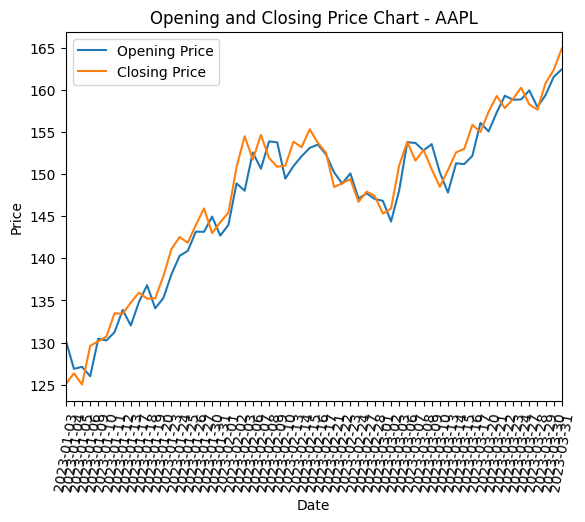

<Figure size 5000x600 with 0 Axes>

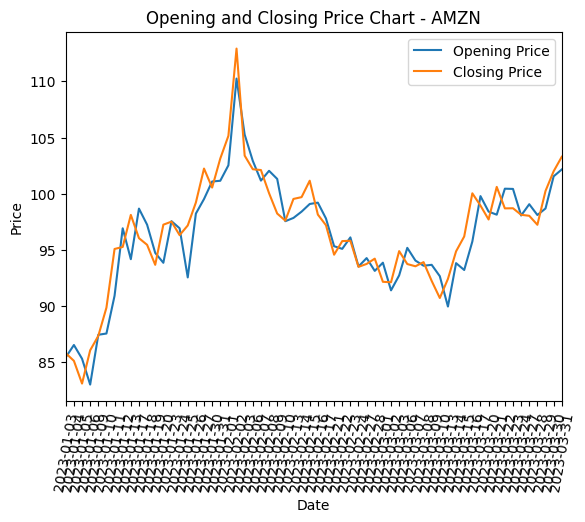

<Figure size 5000x600 with 0 Axes>

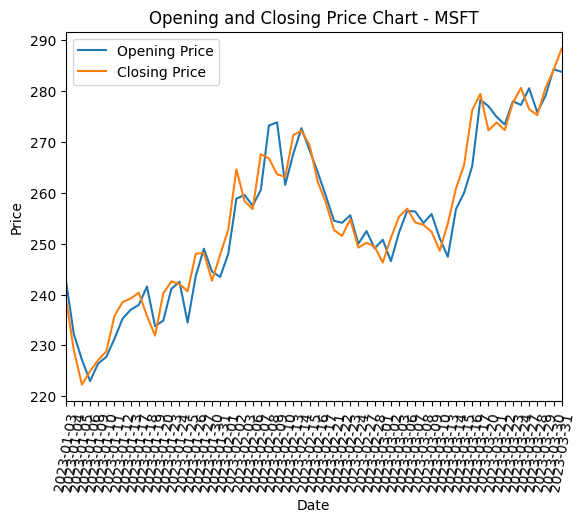

In [ ]:
# code is used for analysis of stock closing and opening price trends 
for i in range(len(stockList)):
  # fetch data from database and store in dataframe
  conn = sqlite3.connect('StockPerformanceAnalysis.db')
  query = "SELECT * FROM StockPerformanceDetails where StockCode='"+stockList[i]+"'"
  stockDataTable = pd.read_sql_query(query, conn)
  conn.close()

  # data for opening and closing price against date
  dates = stockDataTable['TradingDate']
  opening_prices = stockDataTable['OpeningAmount']
  closing_prices = stockDataTable['ClosingAmount']

  fig = plt.figure(figsize=(50,6))

  # create a figure and axis
  fig, ax = plt.subplots()

  # plot opening and closing prices against date
  ax.plot(dates, opening_prices, label='Opening Price')
  ax.plot(dates, closing_prices, label='Closing Price')

  # set axis labels and title
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  title="Opening and Closing Price Chart - "+stockList[i]
  ax.set_title(title)

  # set x-axis limits
  ax.set_xlim(dates.min(), dates.max())

  # rotate the x-axis labels
  plt.xticks(rotation=80)

  # set legend
  ax.legend()

  # adjust spacing between subplots
  plt.subplots_adjust(hspace=2)

  # display the chart
  plt.show()

**Candlestick charts** are a popular tool used by traders and investors **to understand the price movements of stocks. These charts display the price action of a stock over a specified period of time, using a combination of candlesticks to represent the open, high, low, and close prices of each trading day.

Candlestick charts can provide valuable insights into the behavior of a stock, including trends, reversals, and price momentum. They can also help identify patterns that indicate potential changes in price direction, such as bullish or bearish trends, and can be used in conjunction with other technical analysis tools to make informed trading decisions.

For example, a long green candlestick with a small upper shadow indicates that buyers were in control for most of the trading session, and the stock closed near its high for the day. This can be interpreted as a bullish signal, suggesting that the stock may continue to rise in price.

On the other hand, a long red candlestick with a small lower shadow indicates that sellers were in control for most of the trading session, and the stock closed near its low for the day. This can be interpreted as a bearish signal, suggesting that the stock may continue to decline in price.

Overall, candlestick charts can be a useful tool for investors and traders looking to gain insights into the price movements of a stock and make informed decisions about when to buy, sell, or hold their positions.

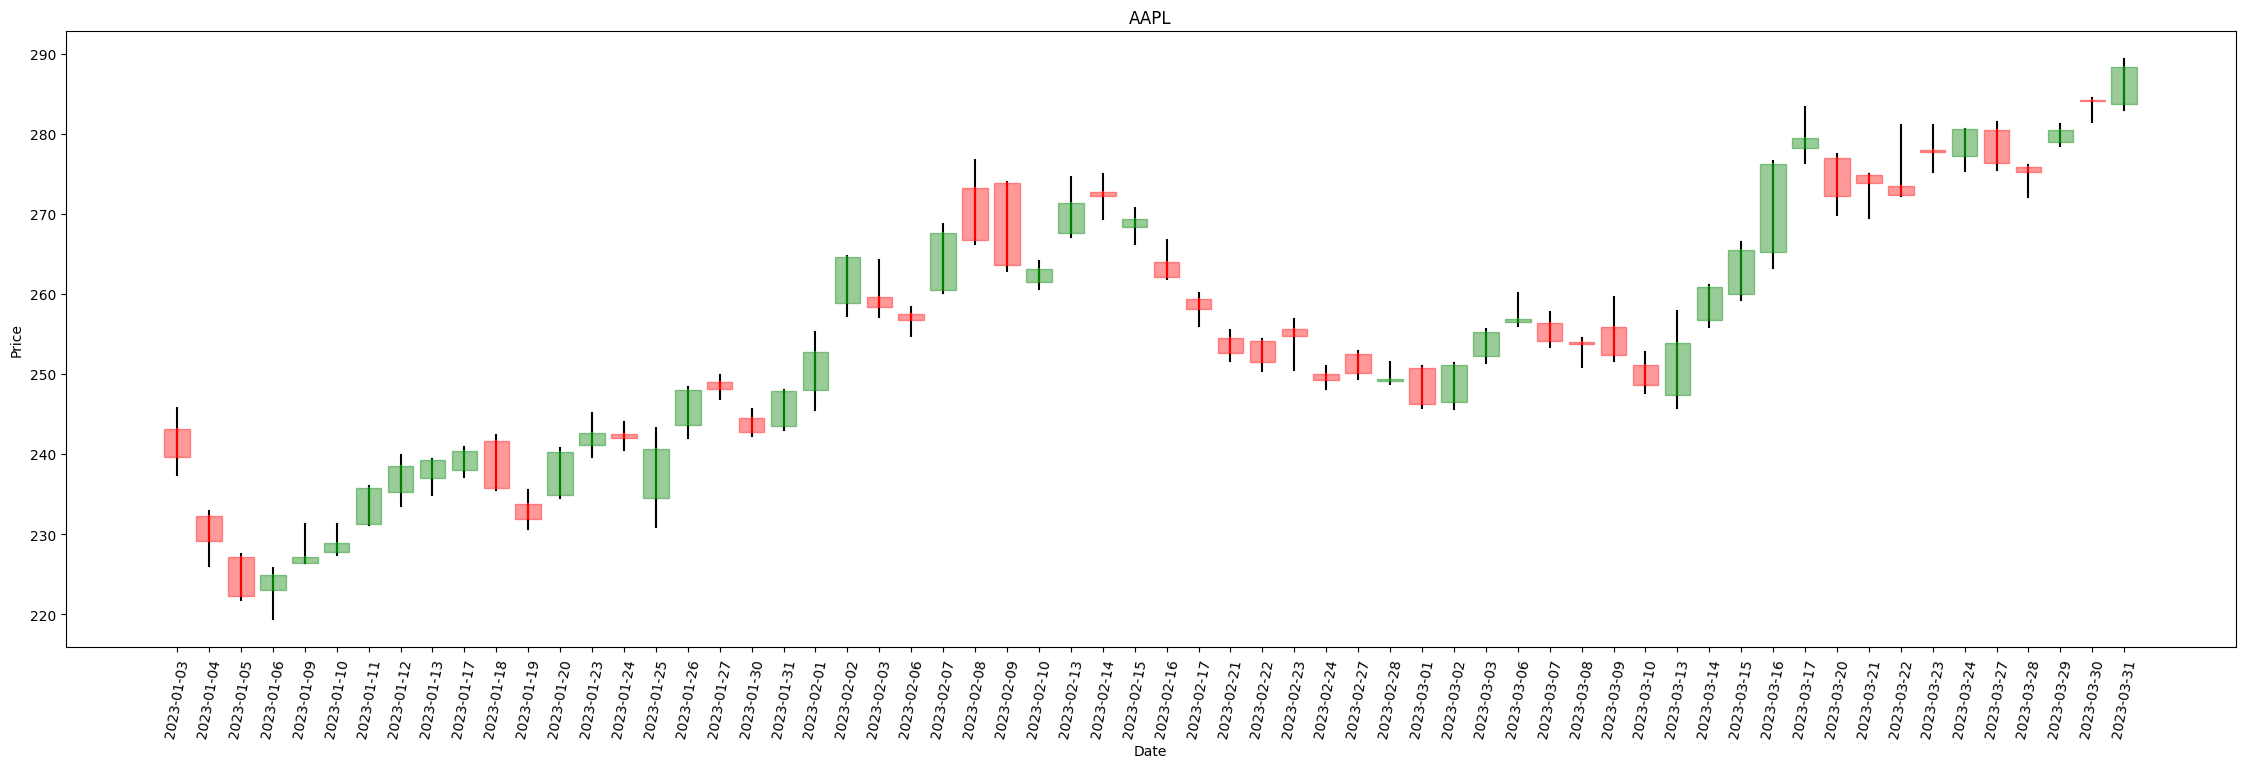

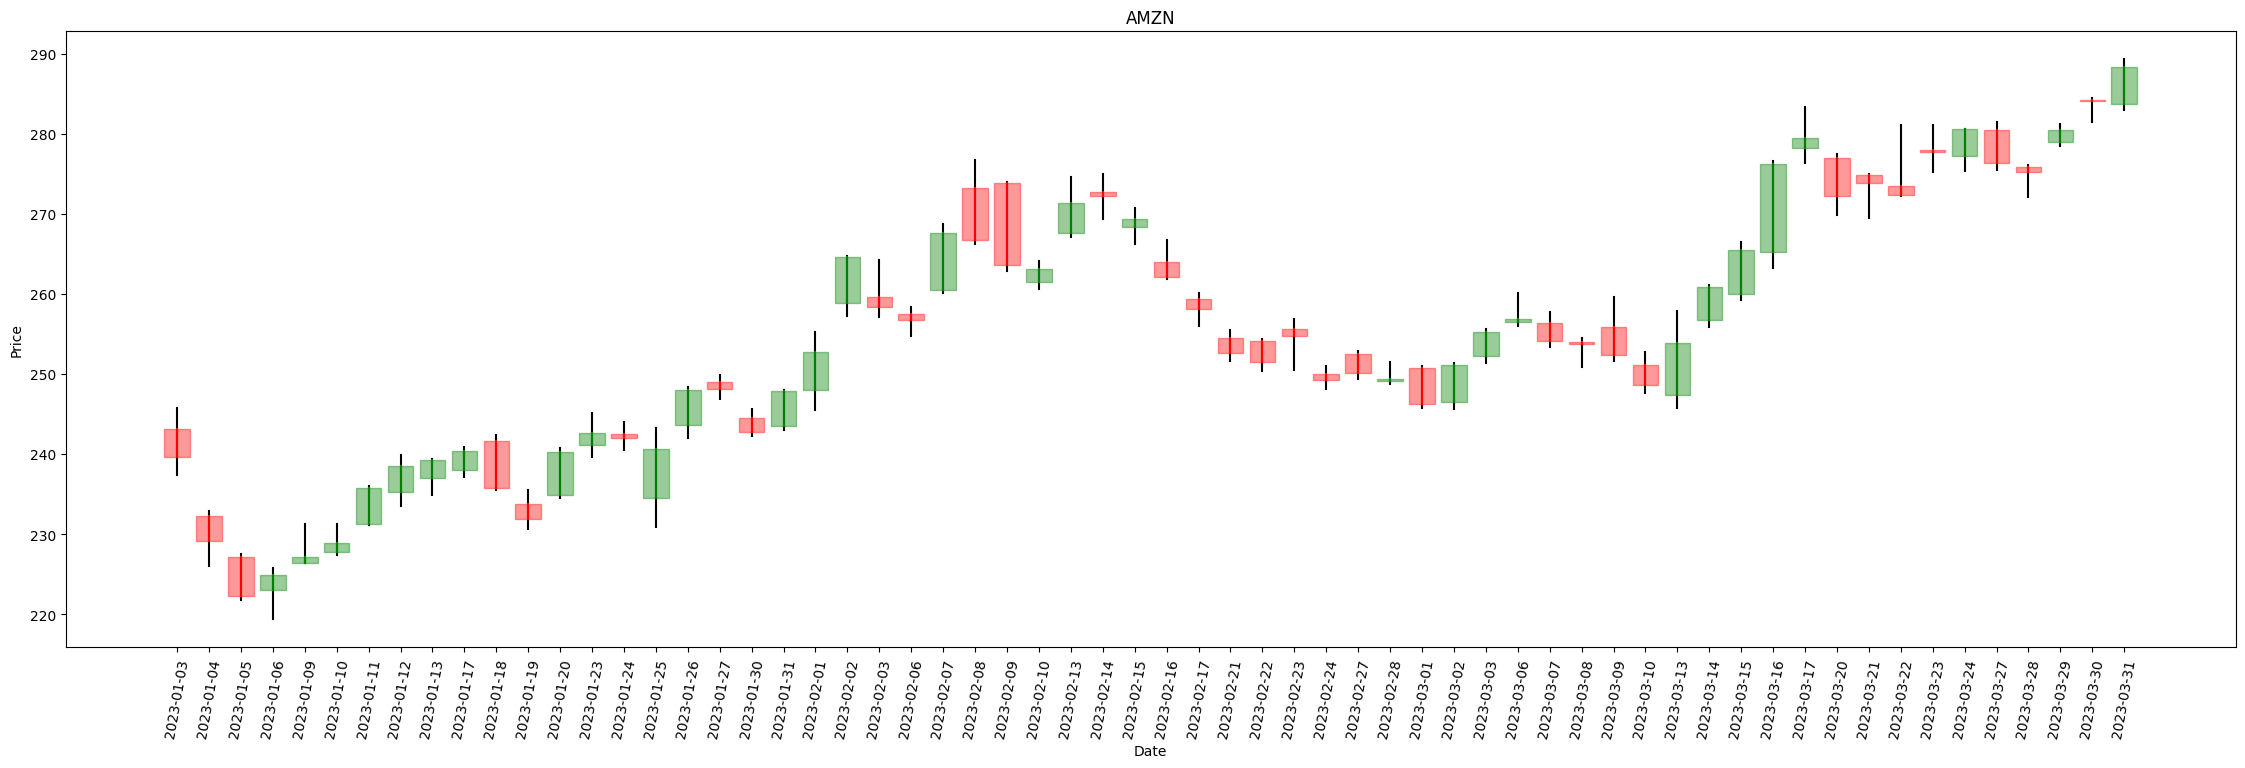

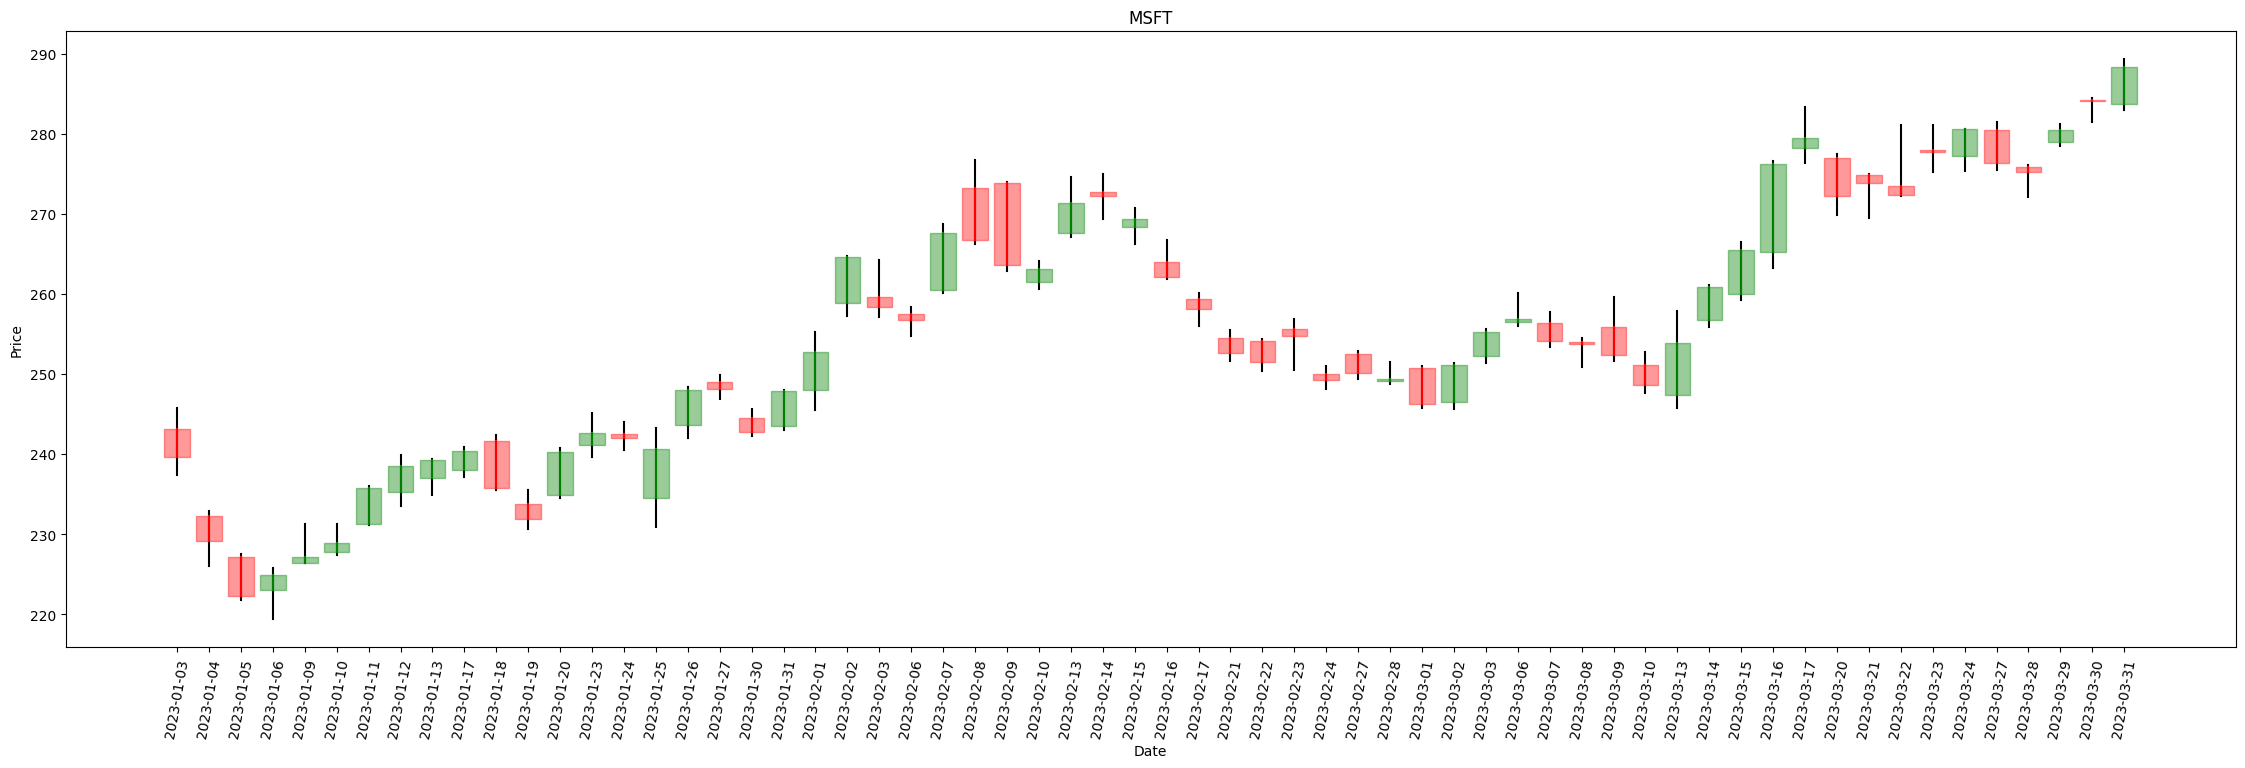

In [ ]:
# code for identifying Bullish or Bearish Trend using Candlestick charts
for x in range(len(stockList)):
  # fetch data from database and store in dataframe
  conn = sqlite3.connect('StockPerformanceAnalysis.db')
  query = "SELECT * FROM StockPerformanceDetails where StockCode='"+stockList[i]+"'"
  stockDataTable = pd.read_sql_query(query, conn)
  conn.close()

  dates = stockDataTable['TradingDate']
  opens = stockDataTable['OpeningAmount']
  closes = stockDataTable['ClosingAmount']
  highs = stockDataTable['HighAmount']
  lows = stockDataTable['LowAmount']

  # Create a figure and set its size
  fig = plt.figure(figsize=(28, 8))

  # Add a subplot for the candlestick chart
  ax = fig.add_subplot(1, 1, 1)

  # Iterate over the data and add each candlestick to the chart
  for a in range(len(stockDataTable)):
    candlestick = (opens[a], closes[a], lows[a], highs[a])
    ax.plot([a, a], [lows[a], highs[a]], color='black')
    if opens[a] > closes[a]:
      ax.plot([a, a], [opens[a], closes[a]], color='red')
      ax.fill_between([a-0.4, a+0.4], closes[a], opens[a], color='red', alpha=0.4)
    else:
      ax.plot([a, a], [opens[a], closes[a]], color='green')
      ax.fill_between([a-0.4, a+0.4], opens[a], closes[a], color='green', alpha=0.4)

  # Set the x-axis labels to the dates
  ax.set_xticks(range(len(dates)))
  ax.set_xticklabels(dates)

  # Add a title and axis labels
  ax.set_title(stockList[x])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

  # rotate the x-axis labels
  plt.xticks(rotation=80)

  # Show the chart
  plt.show()

**Moving Averages Technique**  - These are used to track the average price of a stock over a specific time period, such as 50-day or 200-day moving averages. Traders often use moving averages to identify trend changes and potential support and resistance levels.

Moving averages can be useful for several reasons:

**Identifying Trends:** Moving averages can help identify the direction of 
a stock's trend. If the current price is above the moving average, it suggests an uptrend, and if the current price is below the moving average, it suggests a downtrend.

**Support and Resistance:** Moving averages can also act as support or resistance levels. If a stock's price is approaching a moving average from below, it may find support at that level. Conversely, if the price is approaching a moving average from above, it may find resistance at that level.

**Smoothing Out Noise:** Moving averages can help smooth out short-term price fluctuations, making it easier to see the underlying trend.

Overall, moving averages can be a useful tool for investors and traders who want to better understand the direction and momentum of a stock's price.

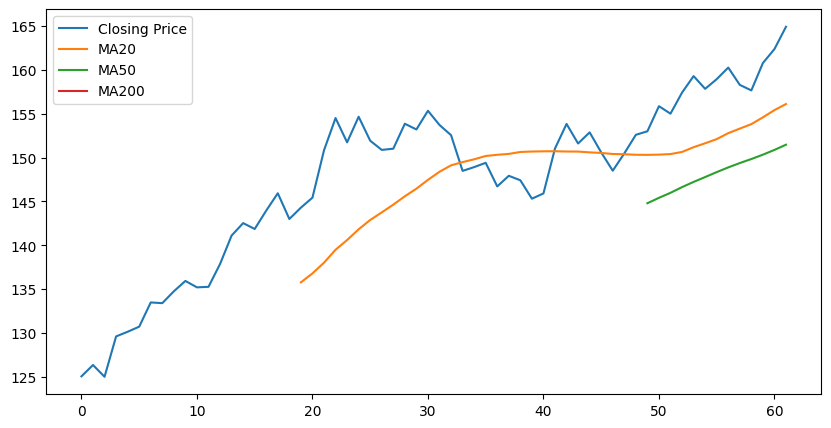

In [ ]:
# code is used for moving average technique to identify stock performance trend
conn = sqlite3.connect('StockPerformanceAnalysis.db')
query = "SELECT * FROM StockPerformanceDetails where StockCode='"+stockList[0]+"'"
stockDataTable = pd.read_sql_query(query, conn)
conn.close()

# Convert date column to datetime format
stockDataTable['TradingDate'] = pd.to_datetime(stockDataTable['TradingDate'])

# Set date column as index
stockDataTable.set_index(stockDataTable.index)

# Define function to calculate moving average
def moving_average(stockDataTable, n):
    MA = stockDataTable.rolling(window=n).mean()
    return MA

# Calculate different moving averages
stockDataTable['MA20'] = moving_average(stockDataTable['ClosingAmount'], 20)
stockDataTable['MA50'] = moving_average(stockDataTable['ClosingAmount'], 50)
stockDataTable['MA200'] = moving_average(stockDataTable['ClosingAmount'], 200)

# Plot the closing price and moving averages
plt.figure(figsize=(10, 5))
plt.plot(stockDataTable.index, stockDataTable['ClosingAmount'], label='Closing Price')
plt.plot(stockDataTable.index, stockDataTable['MA20'], label='MA20')
plt.plot(stockDataTable.index, stockDataTable['MA50'], label='MA50')
plt.plot(stockDataTable.index, stockDataTable['MA200'], label='MA200')
plt.legend(loc='upper left')
plt.show()


The code splits the DataFrame into training and test sets, where the first 80% of the data is used for training the model and the remaining 20% is used for testing. It then defines the input features (X) and the output variable (y) for the linear regression model.

The code then fits a linear regression model to the training data using the input features and the output variable. It uses the trained model to predict the future closing amount of the stock for a number of days, and finally calculates the range of predicted future closing amount.

The range of predicted future closing amount is then printed on the console using the formatted string.

In [ ]:
conn = sqlite3.connect('StockPerformanceAnalysis.db')
query = "SELECT * FROM StockPerformanceDetails where StockCode='"+stockList[0]+"'"
stockDataTable = pd.read_sql_query(query, conn)
conn.close()

# Convert index to a DatetimeIndex
stockDataTable.index = pd.to_datetime(stockDataTable.index)

# Split the data into training and test sets
train_size = int(len(stockDataTable) * 0.8)
train_data = stockDataTable[:train_size]
test_data = stockDataTable[train_size:]

# Define X and y
X_train = np.array((train_data.index - train_data.index[0]).days).reshape(-1, 1)
y_train = np.array(train_data['ClosingAmount'])
X_test = np.array((test_data.index - test_data.index[0]).days).reshape(-1, 1)

# Fit a linear regression model to the training data
reg = LinearRegression().fit(X_train, y_train)

# Predict the future closing amount
num_days = (test_data.index[-1] - test_data.index[0]).days + 1
X_future = np.array(range(num_days)).reshape(-1, 1)
y_pred = reg.predict(X_test[-1].reshape(1, -1))
for i in range(num_days):
    y_pred = np.append(y_pred, reg.predict(X_future[i].reshape(1, -1)))

# Calculate the range of predicted future closing amount
min_price = np.min(y_pred)
max_price = np.max(y_pred)
print(f"The predicted range of future closing amount is {min_price:.2f} to {max_price:.2f}")


The predicted range of future closing amount is 144.63 to 144.63


The pre-processed data is split into training and test sets. The training set is used to fit a random forest regression model with 100 estimators to predict the future closing amount of the stock. The model is trained using the number of days since the first observation as the input feature (X_train) and the closing amount as the target feature (y_train).

The test set is used to evaluate the performance of the trained model. The future closing amount of the stock is predicted using the trained model for each day in the test set. The predicted range of future closing amounts is calculated as the minimum and maximum of the predicted values.


In [ ]:
conn = sqlite3.connect('StockPerformanceAnalysis.db')
query = "SELECT * FROM StockPerformanceDetails where StockCode='"+stockList[0]+"'"
stockDataTable = pd.read_sql_query(query, conn)
conn.close()

# Convert index to a DatetimeIndex
stockDataTable.index = pd.to_datetime(stockDataTable.index)

# Split the data into training and test sets
train_size = int(len(stockDataTable) * 0.7)
train_data = stockDataTable[:train_size]
test_data = stockDataTable[train_size:]

# Define X and y
X_train = np.array((train_data.index - train_data.index[0]).days).reshape(-1, 1)
y_train = np.array(train_data['ClosingAmount'])
X_test = np.array((test_data.index - test_data.index[0]).days).reshape(-1, 1)

from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
reg = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Predict the future closing amount
num_days = (test_data.index[-1] - test_data.index[0]).days + 1
X_future = np.array(range(num_days)).reshape(-1, 1)
y_pred = reg.predict(X_train[-1].reshape(1, -1))
for i in range(num_days):
    y_pred = np.append(y_pred, reg.predict(X_future[i].reshape(1, -1)))

# Calculate the range of predicted future closing amount
min_price = np.min(y_pred)
max_price = np.max(y_pred)
print(f"The predicted range of future closing amount is {min_price:.2f} to {max_price:.2f}")


The predicted range of future closing amount is 143.60 to 143.60
